
# Logistic Regression 3-class Classifier

Show below is a logistic-regression classifiers decision boundaries on the
first two dimensions (sepal length and width) of the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. The datapoints
are colored according to their labels.


In [9]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.model_selection import GridSearchCV
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
# Define the parameter grid
param_grid = [
    {'penalty': ['l2'], 'C': [0.01,0.1,1, 1e2, 1e5], 'solver': ['lbfgs'], 'max_iter': [5000]},
    {'penalty': ['l1'], 'C': [0.01,0.1,1, 1e2, 1e5], 'solver': ['saga'], 'max_iter': [5000]},
    {'penalty': ['elasticnet'], 'C': [0.01,0.1,1, 1e2, 1e5], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [5000]}
]


GridSearchCV(cv=20, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 100.0, 100000.0],
                          'max_iter': [5000], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.01, 0.1, 1, 100.0, 100000.0],
                          'max_iter': [5000], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'C': [0.01, 0.1, 1, 100.0, 100000.0],
                          'l1_ratio': [0.5], 'max_iter': [5000],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='f1_micro')

In [28]:

# Create a LogisticRegression model
logreg = LogisticRegression()

# Set up the GridSearchCV
logreg = GridSearchCV(logreg, param_grid, cv=20, scoring='accuracy', n_jobs=-1)

# Fit the model
logreg.fit(X, Y)


GridSearchCV(cv=20, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 100.0, 100000.0],
                          'max_iter': [5000], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.01, 0.1, 1, 100.0, 100000.0],
                          'max_iter': [5000], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'C': [0.01, 0.1, 1, 100.0, 100000.0],
                          'l1_ratio': [0.5], 'max_iter': [5000],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

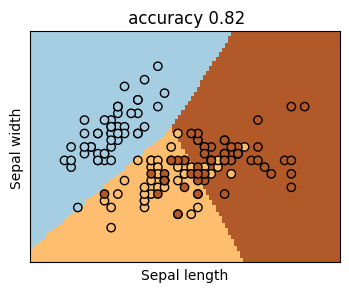

In [29]:

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())
plt.title(f" accuracy {logreg.score(X,Y):.2f}")
plt.show()

In [30]:
import pandas as pd
results_df = pd.DataFrame(logreg.cv_results_)

# Display the DataFrame with relevant columns
results_df = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
# print(results_df)

# Sort the DataFrame by mean_test_score for better readability
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
results_df

,params,mean_test_score,std_test_score,rank_test_score
2,"{'C': 1, 'max_iter': 5000, 'penalty': 'l2', 's...",0.814286,0.142006,1
12,"{'C': 1, 'l1_ratio': 0.5, 'max_iter': 5000, 'p...",0.814286,0.142006,1
7,"{'C': 1, 'max_iter': 5000, 'penalty': 'l1', 's...",0.814286,0.126823,3
8,"{'C': 100.0, 'max_iter': 5000, 'penalty': 'l1'...",0.813393,0.122093,4
9,"{'C': 100000.0, 'max_iter': 5000, 'penalty': '...",0.813393,0.122093,4
13,"{'C': 100.0, 'l1_ratio': 0.5, 'max_iter': 5000...",0.813393,0.122093,4
14,"{'C': 100000.0, 'l1_ratio': 0.5, 'max_iter': 5...",0.813393,0.122093,4
3,"{'C': 100.0, 'max_iter': 5000, 'penalty': 'l2'...",0.807143,0.128224,8
4,"{'C': 100000.0, 'max_iter': 5000, 'penalty': '...",0.807143,0.128224,8
1,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', ...",0.800000,0.129215,10
